# Chapter.3 Single-variate Linear Regression without Bias Term

PA 03-01은 다음과 같은 단계로 이루어집니다.

<ul>
    <li> Step.1 Dataset Generation </li>    
    NumPy를 이용하여 PA 03-01에 필요한 dataset을 만듭니다.
    <li> Step.2 Gradient Descent Method </li>
    GDM을 이용하여 predictor를 학습시킵니다.
    <li> Step.3 Predictor Visualization </li>
    predictor가 학습되는 모습을 시각화하여 제대로 학습이 일어나는지 확인합니다.        
</ul>

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use('seaborn')
np.random.seed(0)

***
## Step.1 Dataset Generation

### Target Function
linear regression model을 학습시키기 위한 dataset을 먼저 만들어봅니다. dataset은

$$y = 3x$$

에서부터 만들어지며, 따라서 target function은 $y = 3x$입니다.

***
**Programming**

먼저 x값을 기준으로 -3부터 3까지 target function을 그려봅니다.



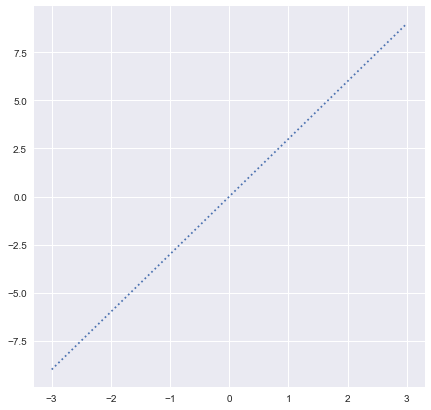

In [17]:
t_x = np.linspace(-3,3,2)
t_y = 3*t_x

fig, ax = plt.subplots(figsize = (7,7))
ax.plot(t_x, t_y, linestyle = ":")

### Data Samples

signle-variate linear regression의 dataset은 1개의 x값과 그에 따른 1개의 y값으로 이루어집니다.

그리고 target function과 같은 함수에서부터 만들어지며 Gaussian noise가 추가됩니다.

***
**Programming**

PA 03-01에서는 100개의 data sample들을 standard normal distribution에서부터 만들고, noise도 마찬가지로 standard normal distribution에서부터 만들어진 Gaussian noise를 추가합니다.

(Hint.1) np.random.normal( )

Text(0, 0.5, 'y data')

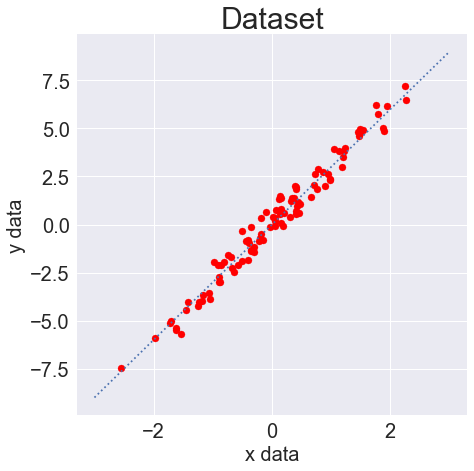

In [18]:
n_sample = 100
x_data = np.random.normal(0, 1, (n_sample,))
y_data = 3*x_data + 0.5*np.random.normal(0, 1, (n_sample,))

# Target Function Visualization
fig, ax = plt.subplots(figsize = (7,7))
ax.plot(t_x, t_y, linestyle = ':')

# Dataset Visualization
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

***
## Step.2 Gradient Descent Method

위의 dataset에 따라 predictor는
$$ \hat{y} = \theta x$$
로 설정할 수 있습니다.

그리고 i번째 data sample에 대한 loss($\mathcal{L}^{(i)}$)는 
$$ \mathcal{L}^{(i)} = (y^{(i)} - \hat{y}^{(i)})^{2} = (y^{(i)} - \theta x^{(i)})^{2}$$
로 정의됩니다.

따라서 $\theta$에 대한 $\mathcal{L}^{(i)}$의 partial derivative는
$$ \frac{\partial \mathcal{L}^{(i)}}{\partial \theta} = -2x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$
입니다.

마지막으로 이를 이용한 Gradient descent method는

$$ \theta := \theta - \alpha \frac{\partial \mathcal{L}^{(i)}}{\partial \theta}$$

$$ = \theta + 2\alpha x^{(i)}(y^{(i)} - \hat{y}^{(i)})$$
입니다.

***
**Programming**

initial theta(th)는 0.1, learning rate(lr)는 0.001, 총 epoch(epochs)는 50으로 설정하고 gradient descent method를 이용하여 optimal theta에 대한 approximation을 진행하세요.

(Hint.1) $\theta$의 변화와 loss를 추적하기 위하여 빈 리스트 th_list, loss_list를 각각 만들어줍니다.

Substituting symbol L from STIXNonUnicode
Substituting symbol L from STIXNonUnicode


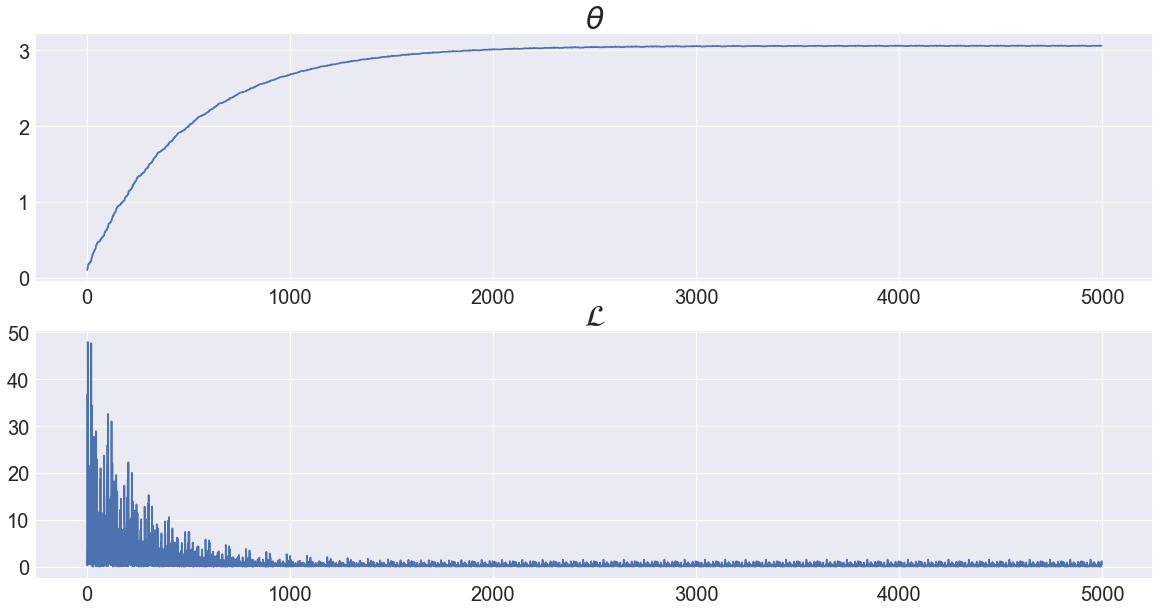

In [20]:
th = 0.1
lr = 0.001
epochs = 50

th_list = []
loss_list = []

for epoch in range(epochs):
    for data_idx, (x, y) in enumerate(zip(x_data, y_data)):
        pred = th*x
        loss = np.power(y - pred, 2)

        th_list.append(th)
        loss_list.append(loss)
        
        th = th + 2*x*lr*(y - pred)
        
fig, ax = plt.subplots(2, 1, figsize = (20,10))
ax[0].plot(th_list)
ax[1].plot(loss_list)
ax[0].set_title(r'$\theta$', fontsize = 30)
ax[1].set_title(r'$\mathcal{L}$', fontsize = 30)
for ax_idx in range(2):
    ax[ax_idx].tick_params(axis = 'both', labelsize = 20)

***
## Step.3 Predictor Visualization

다음 셀을 실행하여 초기 predictor $\hat{y} = 0.1x$가 학습을 거쳐 dataset을 잘 표현하는 predictor로 학습되는지 확인하세요.

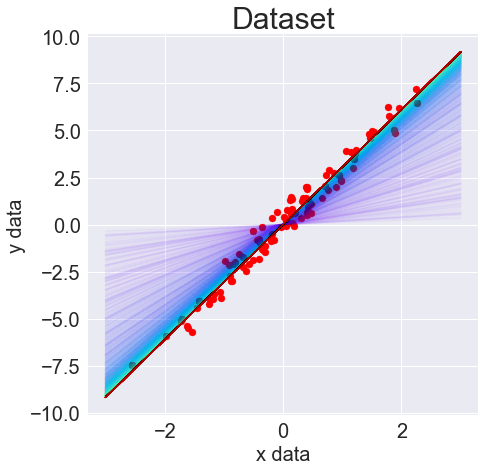

In [21]:
fig, ax = plt.subplots(figsize = (7,7))
ax.scatter(x_data, y_data, color = 'r')
ax.tick_params(axis = 'both', labelsize = 20)
ax.set_title("Dataset", fontsize = 30)
ax.set_xlabel("x data", fontsize = 20)
ax.set_ylabel("y data", fontsize = 20)

x_range = np.linspace(-3, 3, 2)
cmap = cm.get_cmap('rainbow', lut = len(th_list))
for th_idx, th in enumerate(th_list):
    predictor = th*x_range
    ax.plot(x_range, predictor,
            color = cmap(th_idx),
            alpha = 0.01)